<a href="https://colab.research.google.com/github/AlineSouzaSantos/Pyhton_Dados/blob/master/Exercicios_Probabilidade_e_Amostragem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exercicios Probabilidade e Amostragem


Você é uma pesquisadora desenvolvendo uma análise sobre as características
da força de trabalho nos estados brasileiros. Responda as perguntas abaixo:
1. Considere pessoas fluentes em inglês, qual a probabilidade
complementar? Ou seja, qual a probabilidade de escolhermos uma pessoa
aleatória e ela não ser fluente em inglês. Considere fluente quem tem o
nível avançado.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('populacao_brasileira.csv.csv')
display(df.head())

,Unnamed: 0,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
0,0,MA,56,Fundamental,Intermediário,4006.29,F
1,1,BA,46,Superior,Básico,2423.11,M
2,2,AM,32,Fundamental,Intermediário,3835.69,M
3,3,CE,60,Superior,Básico,1870.29,M
4,4,SE,25,Fundamental,Avançado,3529.80,M


In [25]:
print(df.columns)
print(df.dtypes)
print(df.shape)
print(df.isnull().sum())
prificiencia_ingles = 'nível de proficiência em inglês'
print(df[prificiencia_ingles].value_counts(dropna=False))

Index(['Unnamed: 0', 'estado', 'idade', 'escolaridade',
       'nível de proficiência em inglês', 'renda', 'sexo'],
      dtype='object')
Unnamed: 0                           int64
estado                              object
idade                                int64
escolaridade                        object
nível de proficiência em inglês     object
renda                              float64
sexo                                object
dtype: object
(1000, 7)
Unnamed: 0                         0
estado                             0
idade                              0
escolaridade                       0
nível de proficiência em inglês    0
renda                              0
sexo                               0
dtype: int64
nível de proficiência em inglês
Avançado         344
Intermediário    329
Básico           327
Name: count, dtype: int64


In [26]:
df_ingles_avancado = df[df['nível de proficiência em inglês'] == 'Avançado']
contagem_ingles_avancado = len(df_ingles_avancado)
print(f"Individuos com inglês avançado: {contagem_ingles_avancado}")

Individuos com inglês avançado: 344


In [27]:
total_individuos = len(df)
probabilidade_fluente = contagem_ingles_avancado / total_individuos
probabilidade_nao_fluente = 1 - probabilidade_fluente

print(f"Probabilidade de ser fluente em Inglês: {probabilidade_fluente}")
print(f"Probabilidade de não ser fluente em Inglês: {probabilidade_nao_fluente}")

Probabilidade de ser fluente em Inglês: 0.344
Probabilidade de não ser fluente em Inglês: 0.656


2. Se uma pessoa escolhida aleatoriamente for de Alagoas ou do Pará, qual
é a probabilidade de ela ter uma renda superior a 5 mil reais?

In [28]:
alagoas_para = df[(df['estado'] == 'AL') | (df['estado'] == 'PA')]

renda_acima_5k = alagoas_para[alagoas_para['renda'] > 5000]

probabilidade = len(renda_acima_5k) / len(alagoas_para)

print(f"Probabilidade de renda superior a 5 mil reais em Alagoas ou Pará: {probabilidade}")


Probabilidade de renda superior a 5 mil reais em Alagoas ou Pará: 0.05063291139240506


3. Descubra a probabilidade de uma pessoa, residente no estado do
Amazonas, ter ensino superior completo (considerando apenas a
escolaridade classificada como 'Superior'). Qual a probabilidade da quinta
pessoa amazonense que você conversar ter ensino superior completo?

In [29]:
amazonas = df[df['estado'] == 'AM']
superior_completo = amazonas[amazonas['escolaridade'] == 'Superior']
probabilidade_superior = len(superior_completo) / len(amazonas)

print(f"Probabilidade de um amazonense ter ensino superior completo: {probabilidade_superior}")
print(f"A probabilidade da quinta pessoa amazonense ter ensino superior completo é: {probabilidade_superior}")


Probabilidade de um amazonense ter ensino superior completo: 0.23684210526315788
A probabilidade da quinta pessoa amazonense ter ensino superior completo é: 0.23684210526315788


4. Considerando a renda das pessoas do nosso conjunto, podemos dizer
que a renda de uma pessoa brasileira está na sua maioria em que faixa
(faça faixa de 1.500 reais)? Qual é a sua função densidade de probabilidade?

A maioria das rendas se encontra na faixa de R$3000 a R$4500


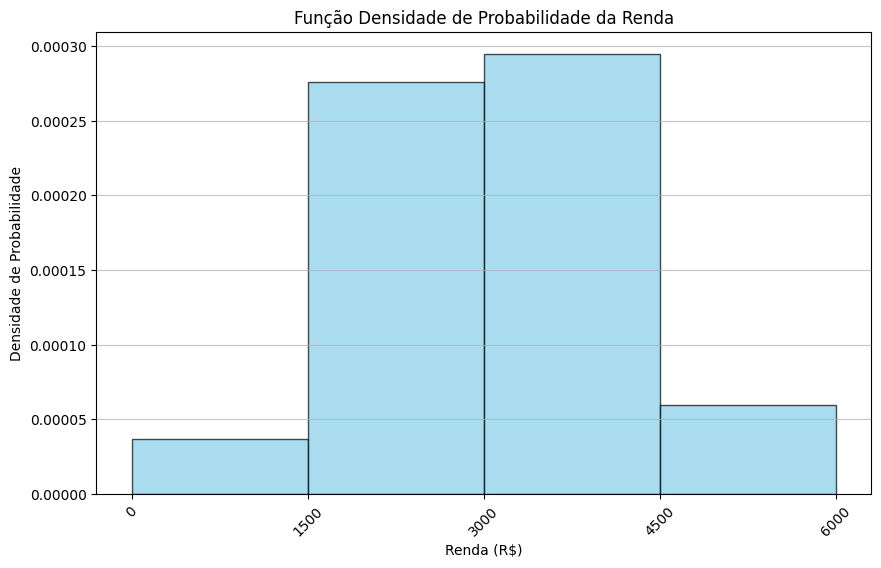

In [31]:
faixas_renda = []
limite_inferior = 0
while limite_inferior < df['renda'].max():
    limite_superior = limite_inferior + 1500
    faixas_renda.append((limite_inferior, limite_superior))
    limite_inferior = limite_superior

contagens_faixas = []
for faixa in faixas_renda:
    contagem = len(df[(df['renda'] >= faixa[0]) & (df['renda'] < faixa[1])])
    contagens_faixas.append(contagem)

# Encontrar a faixa com maior número de pessoas
indice_faixa_maior = np.argmax(contagens_faixas)
faixa_maior = faixas_renda[indice_faixa_maior]

print(f"A maioria das rendas se encontra na faixa de R${faixa_maior[0]} a R${faixa_maior[1]}")

# Função Densidade de Probabilidade (FDP)
plt.figure(figsize=(10, 6))
plt.hist(df['renda'], bins=range(0, int(df['renda'].max()) + 1500, 1500), density=True, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel("Renda (R$)")
plt.ylabel("Densidade de Probabilidade")
plt.title("Função Densidade de Probabilidade da Renda")
plt.xticks(range(0, int(df['renda'].max()) + 1500, 1500), rotation=45)
plt.grid(axis='y', alpha=0.75)
plt.show()



5. Calcule a média e a variância da renda da amostra. Depois faça a
distribuição normal, inclua o gráfico.

Média da renda: 3082.5371800000003
Variância da renda: 993156.228167617


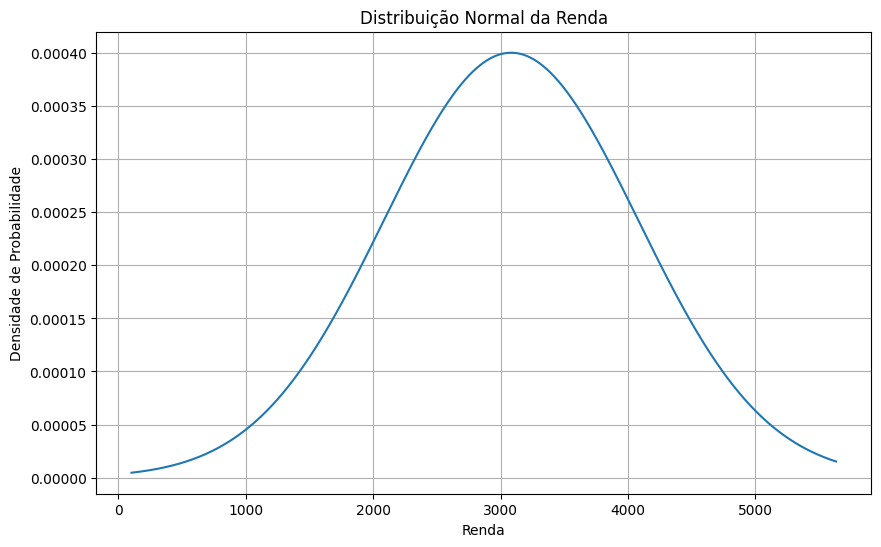

In [33]:
media_renda = df['renda'].mean()
variancia_renda = df['renda'].var()

print(f"Média da renda: {media_renda}")
print(f"Variância da renda: {variancia_renda}")

# Gera a distribuição normal
from scipy.stats import norm

# Define o intervalo para o gráfico
x_min = df['renda'].min()
x_max = df['renda'].max()
x = np.linspace(x_min, x_max, 1000)

# Plota a distribuição normal
plt.figure(figsize=(10, 6))
plt.plot(x, norm.pdf(x, loc=media_renda, scale=np.sqrt(variancia_renda)))
plt.xlabel("Renda")
plt.ylabel("Densidade de Probabilidade")
plt.title("Distribuição Normal da Renda")
plt.grid(True)
plt.show()


6. Primeiro considere a probabilidade encontrada no nosso conjunto de
pessoas com escolaridade de pós-graduação. Considerando a amostra de
população brasileira com 1 milhão de habitantes, qual a probabilidade de
encontrarmos 243 mil pessoas com pós-graduação?

In [34]:
pos_graduacao = df[df['escolaridade'] == 'Pós-graduação']
probabilidade_pos = len(pos_graduacao) / len(df)

populacao_total = 1000000
pessoas_pos_esperadas = populacao_total * probabilidade_pos

probabilidade_243k = 243000 / populacao_total

print(f"Probabilidade de uma pessoa ter pós-graduação na amostra: {probabilidade_pos}")
print(f"Número esperado de pessoas com pós-graduação em uma população de 1 milhão: {pessoas_pos_esperadas}")
print(f"Probabilidade de encontrar 243 mil pessoas com pós-graduação em uma população de 1 milhão: {probabilidade_243k}")


Probabilidade de uma pessoa ter pós-graduação na amostra: 0.253
Número esperado de pessoas com pós-graduação em uma população de 1 milhão: 253000.0
Probabilidade de encontrar 243 mil pessoas com pós-graduação em uma população de 1 milhão: 0.243


7. Somando as densidades nós temos a função de densidade acumulada.
Considerando a coluna ‘Escolaridade’ faça a função de densidade
acumulada discreta para cada nível de escolaridade.

In [35]:
escolaridade_counts = df['escolaridade'].value_counts(normalize=True).sort_index()
densidade_acumulada = escolaridade_counts.cumsum()
densidade_acumulada


,proportion
escolaridade,
Fundamental,0.266
Médio,0.504
Pós-graduação,0.757
Superior,1.000


8. Qual a margem de erro amostral da proporção populacional
considerando a proporção de pessoas com nível de inglês intermediário?

In [37]:
n_intermediario = len(df[df[prificiencia_ingles] == 'Intermediário'])
proporcao_intermediario = n_intermediario / len(df)

# Define o nível de confiança (95%)
nivel_confianca = 0.95

# Calcula o valor crítico Z para o nível de confiança
z_critico = norm.ppf((1 + nivel_confianca) / 2)

# Define o tamanho da amostra
n = len(df)

# Calcula a margem de erro
margem_erro = z_critico * np.sqrt((proporcao_intermediario * (1 - proporcao_intermediario)) / n)

print(f"A margem de erro amostral para a proporção de pessoas com nível de inglês intermediário é: {margem_erro}")


A margem de erro amostral para a proporção de pessoas com nível de inglês intermediário é: 0.029121068108804226


9. Calcula a renda da população. Qual a probabilidade de encontrar 60
pessoas com uma renda mil reais superior à média?

In [39]:

media_renda = df['renda'].mean()
# print(media_renda)
pessoas_acima_media = df[df['renda'] > media_renda + 1000]
# print(len(pessoas_acima_media))
n_pessoas_acima_media = len(pessoas_acima_media)
n_total = len(df)

probabilidade_pessoa_acima_media = n_pessoas_acima_media / n_total

# Probabilidade de encontrar exatamente 60 pessoas com renda 1000 acima da média em uma amostra de tamanho n
from scipy.stats import binom
n = 60 # tamanho da amostra
p = probabilidade_pessoa_acima_media
k = 60 # número de sucessos (pessoas com renda acima da média)

probabilidade_60_pessoas = binom.pmf(k, n, p)

print(f"A probabilidade de encontrar 60 pessoas com renda mil reais superior à média é: {probabilidade_60_pessoas}")


A probabilidade de encontrar 60 pessoas com renda mil reais superior à média é: 2.5677489595221674e-48


10. Qual é a probabilidade de escolhermos uma pessoa residente na região
Sudeste que seja homem, tenha apenas ensino fundamental completo e
possua renda mensal superior a 2 mil reais?

In [41]:
sudeste_homens = df[(df['estado'].isin(['SP', 'RJ', 'MG', 'ES'])) & (df['sexo'] == 'Masculino') & (df['escolaridade'] == 'Fundamental') & (df['renda'] > 2000)]
probabilidade_sudeste = len(sudeste_homens) / len(df)
print(f"A probabilidade de escolhermos uma pessoa residente na região Sudeste que seja homem, tenha apenas ensino fundamental completo e possua renda mensal superior a 2 mil reais é: {probabilidade_sudeste}")


A probabilidade de escolhermos uma pessoa residente na região Sudeste que seja homem, tenha apenas ensino fundamental completo e possua renda mensal superior a 2 mil reais é: 0.0
